<a href="https://colab.research.google.com/github/marcelohirota/movies_analysis/blob/master/movie_info_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading database to a variable**

In [1]:
import pandas as pd

movies_rat = pd.read_csv("ratings.csv")
movies_rat.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# **Plotting chart to help visualization (3 ways to visualize this data)**

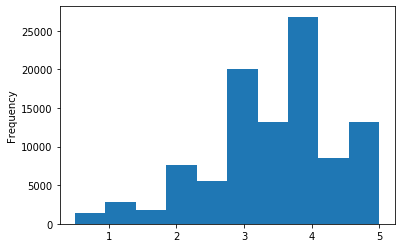

In [2]:
movies_rat.rating.plot(kind = "hist")

In [3]:
movies_rat.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

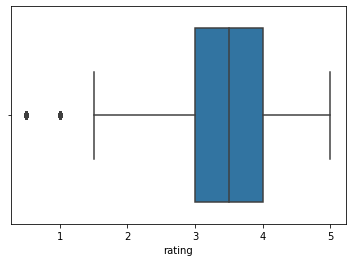

In [4]:
import seaborn as sns

sns.boxplot(movies_rat.rating)

# Importing Movies information to a variable

In [5]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Mean rating for each movie

In [6]:
mean_movies = movies_rat.groupby("movieId").mean()["rating"]
mean_movies.head()

movieId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

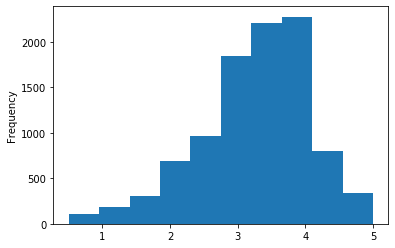

In [7]:
mean_movies.plot(kind = "hist")

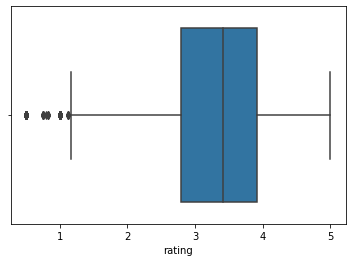

In [8]:
sns.boxplot(mean_movies)

In [9]:
mean_movies.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

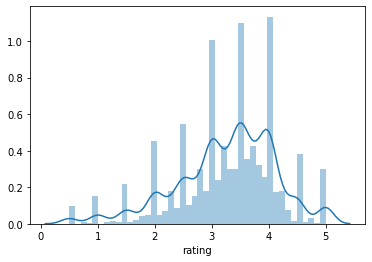

In [10]:
sns.distplot(mean_movies)

#**Preparing language data for charts**

In [11]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [13]:
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["original_language","total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


#**Plotting chart to compare languages**

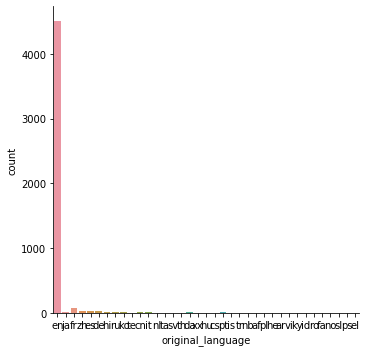

In [14]:
sns.catplot(x="original_language", kind = "count", data = tmdb)

In [15]:
total_languages = tmdb["original_language"].value_counts()
total = total_languages.sum()
total_en = total_languages.loc["en"]
total_others = total - total_en
print(total_en, total_others)

4505 298


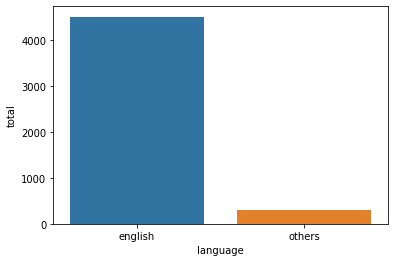

In [16]:
movies_data = {
    "language" : ["english", "others"],
    "total": [total_en, total_others]
}

movies_data = pd.DataFrame(movies_data)

sns.barplot(data = movies_data, x = 'language', y = 'total')

#**Chart for other languages than english**

**Plotting a chart to visualise other languagues**

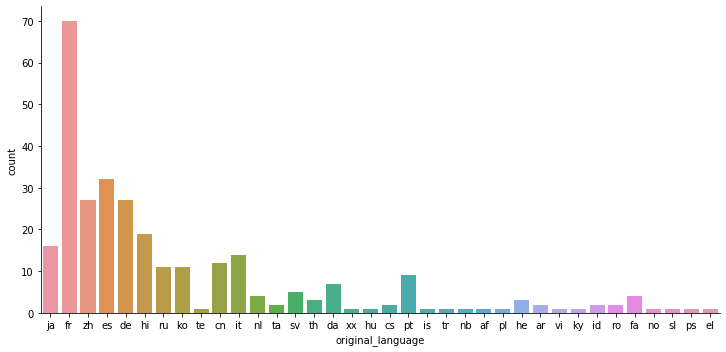

In [20]:
total_languages_other = tmdb.query("original_language != 'en'").original_language.value_counts()
movies_other_lan = tmdb.query("original_language != 'en'")

sns.catplot(x="original_language", kind = "count", data = movies_other_lan, aspect = 2)

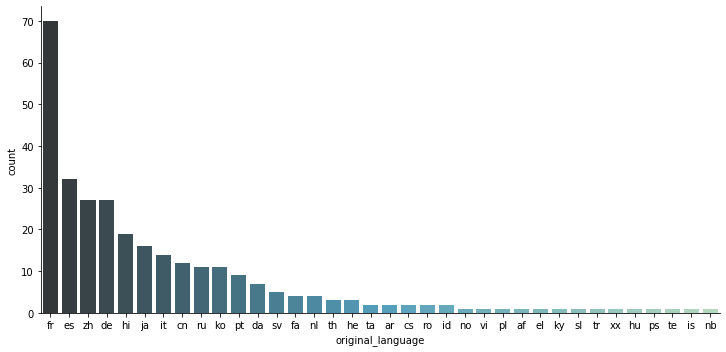

In [26]:
sns.catplot(x="original_language", kind = "count", data = movies_other_lan, aspect = 2, palette = "GnBu_d", order = total_languages_other.index)

**Same chart but with a better visualization**

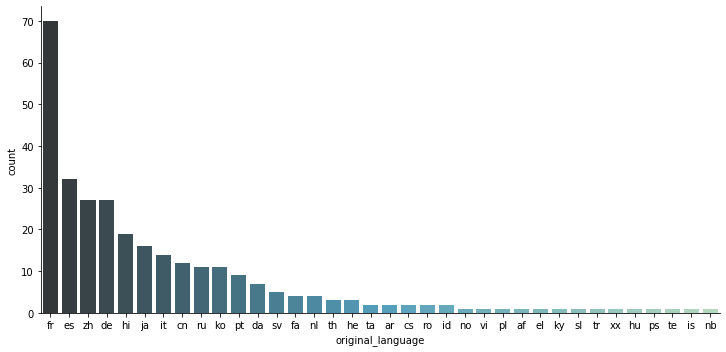

In [37]:
sns.catplot(x="original_language", kind = "count", data = movies_other_lan, aspect = 2, palette = "GnBu_d", order = total_languages_other.index)

#**Movies statistics (Toy Story and Jumanji)**

In [36]:
movies.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [35]:
toy_story_rantings = movies_rat.query("movieId == 1")
jumanji_rantings = movies_rat.query("movieId == 2")
print(len(toy_story_rantings), len(jumanji_rantings))

215 110


In [34]:
print("The average rating for Toy Story is %.2f" % toy_story_rantings.rating.mean())
print("The average rating for Jumanji is %.2f" % jumanji_rantings.rating.mean())

The average rating for Toy Story is 3.92
The average rating for Jumanji is 3.43
